In [3]:
# import libraries for our project

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [4]:
# read in the data

df = pd.read_csv('/kaggle/input/movies/movies.csv')

In [5]:
# let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Then let's checking if there is any missing value

for col in df.columns:
    PctMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, PctMissing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
#We can see we do have some missing values, expecially in 'budget' and 'gross' columns

df.dropna(subset=['budget','gross', 'runtime','votes'], inplace=True)

#Drop duplicates if any

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [8]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# For the budget and gross column, we don't really need the float
# Let's convert the data type into integer
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = pd.to_timedelta(df['runtime'], unit='m')

# The column 'released' can be split into 'date', 'yearcorrect' and 'releasecountry'. Though we don't really know what the country stands for in the 'released'.
#df[['Date', 'Yearcorrect', 'releasecountry']] = df['released'].str.split(', |\(|\)', expand=True)[[0, 1, 2]]
#df

# We can see for movie 'Trojan War', the releasecountry and country are different. And the country United States is the correct country of production.
# Probably the country in the column 'released' just stand for the released date of which country it is, and the date can be vary from country to country
# the column 'released' is confusing and not easy to use, we may just delete it

df.drop('released', axis=1, inplace=True)
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,0 days 02:26:00
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,0 days 01:44:00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,0 days 02:04:00
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,0 days 01:28:00
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,0 days 01:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,0 days 02:04:00
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,0 days 01:39:00
7650,Dolittle,PG,Adventure,2020,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,0 days 01:41:00
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,0 days 01:40:00


In [10]:
# Let's take a look at the movies with descending order in 'gross'

df=df.sort_values(by=['gross'], inplace=False, ascending=False)
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,0 days 02:42:00
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,0 days 03:01:00
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,0 days 03:14:00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,0 days 02:18:00
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,0 days 02:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,0 days 01:37:00
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,0 days 01:48:00
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,0 days 01:25:00
2417,Madadayo,NaN,Drama,1993,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,0 days 02:14:00


<AxesSubplot:title={'center':'Budget vs Gross Earnings'}, xlabel='budget', ylabel='gross'>

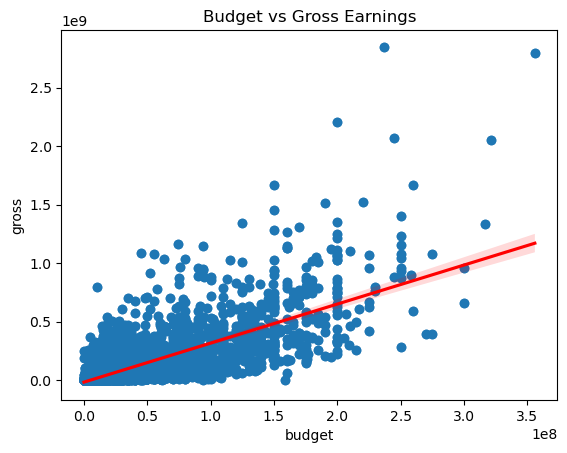

In [11]:
# Now let's make some assumption about the correlations between the datas
# Assume that films with higher budgets make higher gross
# Assume that certain companys make higher gross

#Scatter plot with buget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
sns.regplot(x='budget', y='gross', data=df, line_kws={'color':'red'})

In [12]:
# Let's look at correlation

df.corr()

,year,score,votes,budget,gross
year,1.000000,0.055391,0.205852,0.327793,0.274354
score,0.055391,1.000000,0.473789,0.071821,0.222100
votes,0.205852,0.473789,1.000000,0.440035,0.614895
budget,0.327793,0.071821,0.440035,1.000000,0.740410
gross,0.274354,0.222100,0.614895,0.740410,1.000000


Gross has high correlation with budget and votes

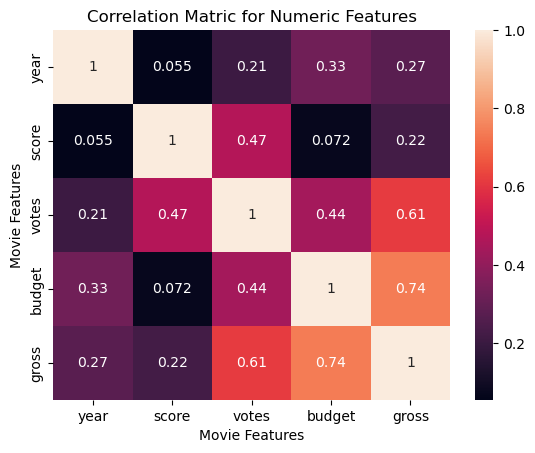

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [14]:
# Let's analysis the company and the gross
# As company is not numerical, let's numerize it first

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,387,5,0,2009,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,0 days 02:42:00
7445,389,5,0,2019,8.4,903000,106,515,1474,47,356000000,2797501328,987,0 days 03:01:00
3045,4922,5,6,1997,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,0 days 03:14:00
6663,3655,5,0,2015,7.8,876000,770,1810,357,47,245000000,2069521700,949,0 days 02:18:00
7244,390,5,0,2018,8.4,897000,106,515,1474,47,321000000,2048359754,987,0 days 02:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2980,5,0,1993,4.5,1900,1810,3111,187,47,5000000,2970,1382,0 days 01:37:00
3681,1599,3,6,2000,6.8,43000,954,1687,528,6,5000000,2554,468,0 days 01:48:00
272,2920,6,9,1982,3.9,2300,263,55,1477,47,800000,2270,584,0 days 01:25:00
2417,2401,-1,6,1993,7.3,5100,23,1220,1687,26,11900000,596,492,0 days 02:14:00


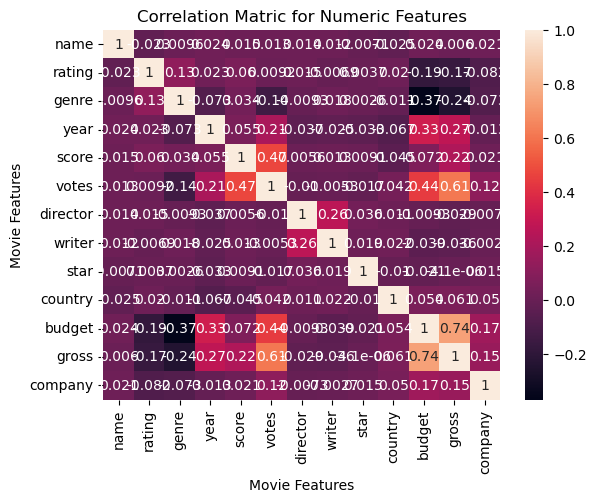

In [15]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company
name,1.000000,-0.023011,0.009647,0.024418,0.014981,0.012923,0.013698,0.011576,-0.007111,-0.024563,0.023695,0.005973,0.021216
rating,-0.023011,1.000000,0.128076,0.022705,0.059517,0.009241,0.014848,-0.006881,0.003740,0.020160,-0.186890,-0.168829,-0.082189
genre,0.009647,0.128076,1.000000,-0.072815,0.033805,-0.136573,-0.009300,0.017790,0.002638,-0.010768,-0.368932,-0.244499,-0.073306
year,0.024418,0.022705,-0.072815,1.000000,0.055391,0.205852,-0.036942,-0.024794,-0.032788,-0.066730,0.327793,0.274354,-0.013061
score,0.014981,0.059517,0.033805,0.055391,1.000000,0.473789,0.005577,0.013130,0.009139,-0.044624,0.071821,0.222100,0.021055
votes,0.012923,0.009241,-0.136573,0.205852,0.473789,1.000000,-0.010196,-0.005301,-0.017134,0.042173,0.440035,0.614895,0.119367
director,0.013698,0.014848,-0.009300,-0.036942,0.005577,-0.010196,1.000000,0.262973,0.036289,0.011107,-0.009341,-0.029365,-0.007337
writer,0.011576,-0.006881,0.017790,-0.024794,0.013130,-0.005301,0.262973,1.000000,0.019255,0.022076,-0.039448,-0.035920,-0.002652
star,-0.007111,0.003740,0.002638,-0.032788,0.009139,-0.017134,0.036289,0.019255,1.000000,-0.010140,-0.021283,-0.000004,0.015087
country,-0.024563,0.020160,-0.010768,-0.066730,-0.044624,0.042173,0.011107,0.022076,-0.010140,1.000000,0.054366,0.060952,0.049560


In [18]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name       1.000000
         rating    -0.023011
         genre      0.009647
         year       0.024418
         score      0.014981
                      ...   
company  star       0.015087
         country    0.049560
         budget     0.171385
         gross      0.150234
         company    1.000000
Length: 169, dtype: float64

In [19]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368932
genre    budget    -0.368932
gross    genre     -0.244499
genre    gross     -0.244499
rating   budget    -0.186890
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
gross    gross      1.000000
company  company    1.000000
Length: 169, dtype: float64

In [28]:
high_corr= sorted_pairs[(sorted_pairs) >0.5]
high_corr

votes     gross       0.614895
gross     votes       0.614895
          budget      0.740410
budget    gross       0.740410
name      name        1.000000
director  director    1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
gross     gross       1.000000
company   company     1.000000
dtype: float64

In [ ]:
# From the matric above, we can not find correlation between the company and the gross but it could probably be because the companies are numerized randomly
# If the companies are numerized by their world ranking, maybe we can find the correlation
# Votes and budget have a high correlation with gross